In [64]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

from qutip.qip.operations import cnot
from qutip.qip.operations import snot
from qutip.qip.operations import csign

In [91]:
π = np.pi
num_basis=2

## CZ and CNOT Locally Equivalent

In [92]:
cz = csign()
cz

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [93]:
qt.tensor(qt.qeye(2), snot()) * cz * qt.tensor(qt.qeye(2), snot())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [72]:
#states
g_state = qt.basis(num_basis, 0)
e_state = qt.basis(num_basis, 1)

gg = qt.tensor(g_state, g_state)
ge = qt.tensor(g_state, e_state)
eg = qt.tensor(e_state, g_state)
ee = qt.tensor(e_state, e_state)

p_state = (g_state+e_state)/np.sqrt(2)
m_state = (g_state-e_state)/np.sqrt(2)

#operators
CNOT = cnot()
SNOT = snot()
x = qt.sigmax()
y = qt.sigmay()
z = qt.sigmaz()

In [73]:
p = 0.01
i_s = []
i = 0
for k in range(0, 100, 1):
    for j in range(0, 10000, 1):
        if (np.random.rand()<0.01):
            i = i + 1
    i_s.append(i)
    i = 0

(array([ 5., 10., 13., 19., 19., 15., 12.,  5.,  1.,  1.]),
 array([ 80. ,  84.9,  89.8,  94.7,  99.6, 104.5, 109.4, 114.3, 119.2,
        124.1, 129. ]),
 <BarContainer object of 10 artists>)

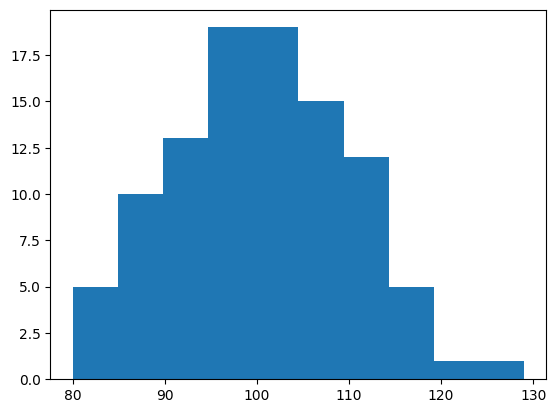

In [74]:
plt.hist(i_s)

In [75]:
#input a fidelity, output a gate

In [76]:
CNOT

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [77]:
CNOT.isherm

True

In [78]:
np.random.uniform(0, 1)

0.3762059980341921

## Uniformly Sample Over Bloch Vectors 

In [79]:
#https://mathworld.wolfram.com/SpherePointPicking.html
def uniform0(n):
    data = []
    for i in range(0, n, 1):
        u = np.random.uniform(0, 1)
        v = np.random.uniform(0, 1)
        
        theta = 2*π*u
        phi = np.arccos(2*v-1)
        
        data.append([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        
    data = np.array(data)
    return data

In [80]:
def uniform1(n):
    data = []
    for i in range(0, n, 1):
        theta = np.random.uniform(0, π)
        phi = np.random.uniform(0, 2*π)      
        data.append([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])
        
    data = np.array(data)
    return data

In [81]:
data = uniform0(1000)

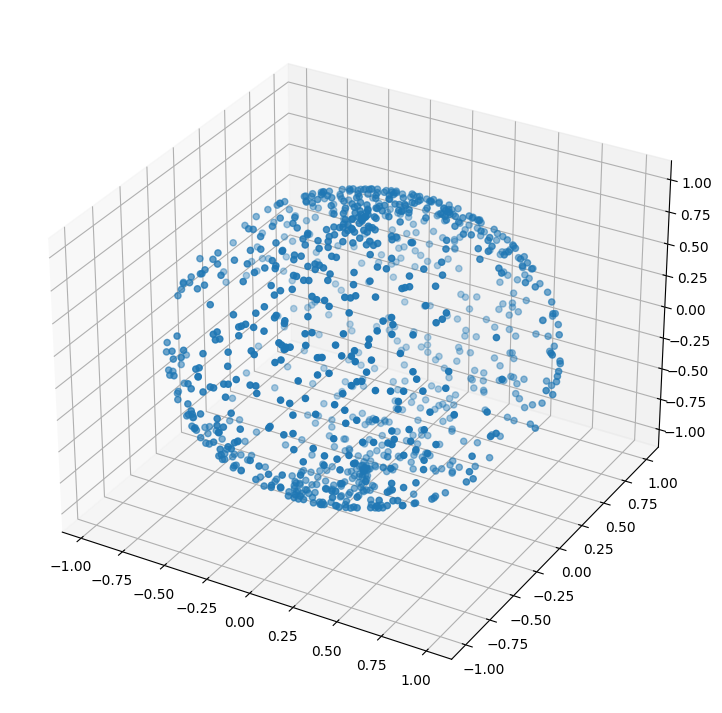

In [82]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(projection='3d')
ax.scatter(data.transpose()[0], data.transpose()[1], data.transpose()[2])

## Parity Checks
four data qubits, fifth qubit ancilla ALWAYS initialized in g

In [154]:
#Z Parity
jointstate = qt.tensor(e_state, e_state, e_state, e_state, g_state)
ca = cnot(N=5, control=0, target=4)
cb = cnot(N=5, control=1, target=4)
cc = cnot(N=5, control=2, target=4)
cd = cnot(N=5, control=3, target=4)
finalstate = ca*cb*cc*cd*jointstate

#project into original state
proj1 = jointstate.proj() 
#project into original state with flipped qubit 5
proj2 = (qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.create(2))*jointstate).proj() 

if (qt.expect(proj1, finalstate) == 1):
    print("even parity")
if (qt.expect(proj2, finalstate) == 1):
    print("odd parity")
    
    
#Next Step: noisy CNOT gates- input a fidelity, output a noisy cnot gate of that fidelity (how should do this)
    #1- random correction to the gate defined by some mean and standard deviation
    #2- obtain real data on noisy cnot gates, quantify the mean and standard deviation of that set
    
finalstate.ptrace(4)

even parity


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

In [182]:
#X Parity
had = qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), SNOT)

jointstate = qt.tensor(p_state, p_state, p_state, p_state, g_state)
ca = cnot(N=5, control=4, target=0)
cb = cnot(N=5, control=4, target=1)
cc = cnot(N=5, control=4, target=2)
cd = cnot(N=5, control=4, target=3)


finalstate = had*ca*cb*cc*cd*had*jointstate

#project into original state
proj1 = jointstate.proj() 
#project into original state with flipped qubit 5
proj2 = (qt.tensor(qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.qeye(2), qt.create(2))*jointstate).proj() 

if math.isclose(qt.expect(proj1, finalstate), 1):
    print("even parity")
if math.isclose(qt.expect(proj2, finalstate), 1):
    print("odd parity")
    
finalstate.ptrace(4)

even parity


Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]